<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by AkashNarayanan B</td>    
</table>
<hr>

# BQM for the Maximum Cut Problem

So far we have learned how to use the Ocean SDK tools. Now let's use those tools to formulate Binary Quadratic Models for some combinatorial optimization problems. In this notebook, we will learn how to formulate BQM for the Maximum Cut problem.



To briefly recall, the goal of the maximum cut problem is to partition a set of vertices of a graph into two disjoint sets such that the number of edges that are cut by the partition is maximized.

The QUBO objective function for a graph with edge set E is 

$$\min \sum_{(i, j) \in E} -x_i - x_j + 2x_ix_j$$

The Ising objective function for a graph with edge set E is

$$\min \sum_{(i, j) \in E} s_i s_j$$

`dwave-networkx` package in the Ocean SDK has implementations of graph-theory algorithms for some combinatorial optimization problems like Maximum Cut, Graph Colouring, Traveling Salesman, etc. You can find out more details about the available algorithms [here](https://docs.ocean.dwavesys.com/en/stable/docs_dnx/reference/algorithms/index.html).

We can either use these already implemented algorithms or solve by formulating the problem as a QUBO or Ising Model from scratch. We will look at both the ways this problem can be solved.

### Imports

In [1]:
from collections import defaultdict

import dimod
from dimod import BQM
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx
from dimod.reference.samplers import ExactSolver

from bqm_utils import graph_viz, maxcut_viz

## Built-in Function

`maximum_cut` is the built-in function in the `dwave-networkx` package for solving the maximum cut problem.

### Parameters

- `G` - NetworkX graph
- `sampler` - BQM sampler for solving the NetworkX graph

We are going to use the classical solver `ExactSolver()` for solving this problem.

Let's try to solve the Max-Cut problem for the following graph.

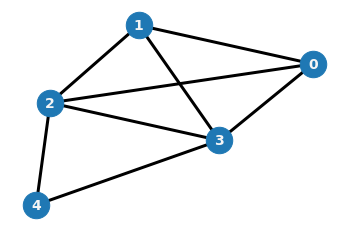

In [9]:
G = nx.house_x_graph()
graph_viz(G)

In [10]:
sampler = ExactSolver()

cut = dnx.maximum_cut(G, sampler)
print(cut)

{2, 3}


The solution says that the vertices 2 and 3 should belong to the same group.

Knowing this, we can deduce that the number of edges in the cut is 6.

Let us visualize the result using the `maxcut_viz` function.

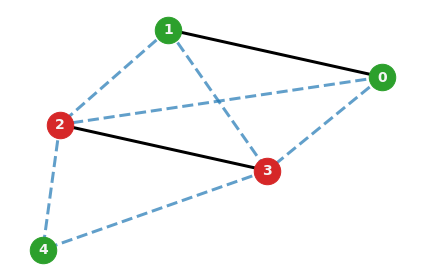

In [5]:
maxcut_viz(G, cut)

### Task 1

Find the maximum cut for the following graph using the built-in function and visualize the result.

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


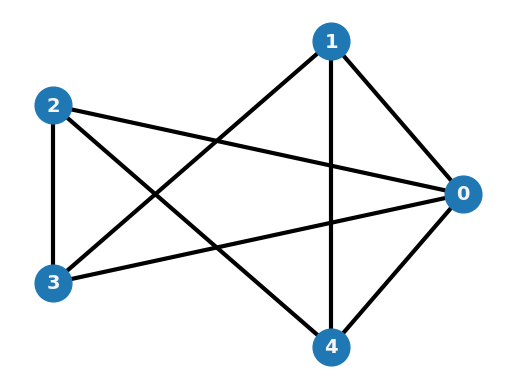

In [2]:
G1 = nx.turan_graph(5, 3)
graph_viz(G1)

{0, 3, 4}


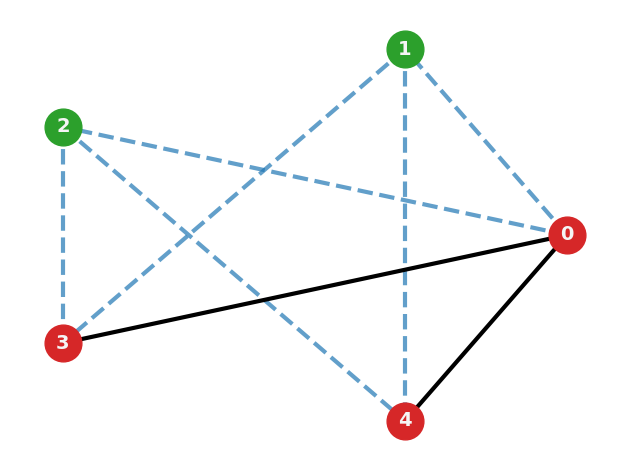

In [4]:
# Your code here
sampler = ExactSolver()

cut = dnx.maximum_cut(G1, sampler)
print(cut)
maxcut_viz(G1, cut)

[click here for solution](BQM_MaxCut_Solution.ipynb#Task1)

---

## Formulating BQM from scratch using QUBO formulation


Now let's learn how to solve the problem by formulating the BQM from scratch using QUBO formulation.


### Step 1 - Define QUBO

Define the QUBO in dictionary form using the objective function

$$\min \sum_{(i, j) \in E} -x_i - x_j + 2x_ix_j$$

In [11]:
# defaultdict(int) initializes all dictionary values to 0
d = defaultdict(int)

# We consider each edge one by one and update the coefficients accordingly
for i, j in G.edges:
    d[(i, i)] += -1
    d[(j, j)] += -1
    d[(i, j)] += 2

print(d)

defaultdict(<class 'int'>, {(0, 0): -3, (1, 1): -3, (0, 1): 2, (2, 2): -4, (0, 2): 2, (3, 3): -4, (0, 3): 2, (1, 2): 2, (1, 3): 2, (2, 3): 2, (4, 4): -2, (2, 4): 2, (3, 4): 2})


### Step 2 - Create BQM instance out of QUBO

Create an instance of BQM using the QUBO dictionary.

In [12]:
bqm = BQM.from_qubo(d)

If necessary, we can inspect the QUBO matrix.

In [13]:
matrix = bqm.to_numpy_matrix()
print(matrix)

[[-3.  2.  2.  2.  0.]
 [ 0. -3.  2.  2.  0.]
 [ 0.  0. -4.  2.  2.]
 [ 0.  0.  0. -4.  2.]
 [ 0.  0.  0.  0. -2.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bqm.to_numpy_matrix() is deprecated since dimod 0.10.0 and will be removed in 0.12.0
  """Entry point for launching an IPython kernel.


### Step 3 - Solve the BQM.

Solve it using `ExactSolver()`.

In [14]:
sampler = ExactSolver()
sampleset = sampler.sample(bqm)

print(sampleset)

    0  1  2  3  4 energy num_oc.
8   0  0  1  1  0   -6.0       1
29  1  1  0  0  1   -6.0       1
4   0  1  1  0  0   -5.0       1
6   1  0  1  0  0   -5.0       1
9   1  0  1  1  0   -5.0       1
11  0  1  1  1  0   -5.0       1
12  0  1  0  1  0   -5.0       1
14  1  0  0  1  0   -5.0       1
17  1  0  0  1  1   -5.0       1
19  0  1  0  1  1   -5.0       1
25  1  0  1  0  1   -5.0       1
27  0  1  1  0  1   -5.0       1
28  0  1  0  0  1   -5.0       1
30  1  0  0  0  1   -5.0       1
2   1  1  0  0  0   -4.0       1
5   1  1  1  0  0   -4.0       1
7   0  0  1  0  0   -4.0       1
13  1  1  0  1  0   -4.0       1
15  0  0  0  1  0   -4.0       1
16  0  0  0  1  1   -4.0       1
18  1  1  0  1  1   -4.0       1
23  0  0  1  1  1   -4.0       1
24  0  0  1  0  1   -4.0       1
26  1  1  1  0  1   -4.0       1
1   1  0  0  0  0   -3.0       1
3   0  1  0  0  0   -3.0       1
20  0  1  1  1  1   -3.0       1
22  1  0  1  1  1   -3.0       1
10  1  1  1  1  0   -2.0       1
31  0  0  

### Step 4 - Get the best sample

We simply take the sample with the lowest energy.

In [10]:
best_sample = sampleset.first.sample
print(best_sample)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 0}


Checking the solution, we see that vertices 2 and 3 should belong to the same group. In this case, we had observed that there would be 6 edges in the cut, which is the energy returned by the solver.

Also note that the second solution also has energy -6, as it is symmetric to the first solution.

### Step 5 - Visualize the result 

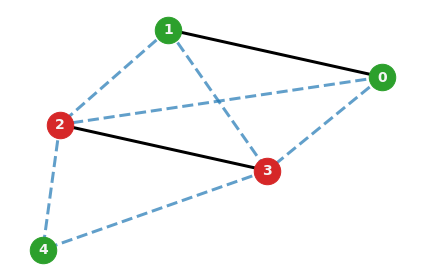

In [11]:
maxcut_viz(G, best_sample)

### Task 2

Obtain the maximum cut for the following graph

1. Define the QUBO dictionary
2. Create an instance of BQM using the dictionary and solve it using the classical solver
3. Visualize the output obtained from the sampleset

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


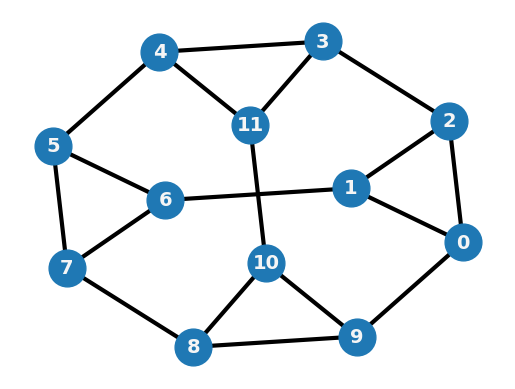

In [5]:
G2 = nx.truncated_tetrahedron_graph()
graph_viz(G2)

In [6]:
# Your code here
d2 = defaultdict(int)

# We consider each edge one by one and update the coefficients accordingly
for i, j in G2.edges:
    d2[(i, i)] += -1
    d2[(j, j)] += -1
    d2[(i, j)] += 2

print(d2)

defaultdict(<class 'int'>, {(0, 0): -3, (1, 1): -3, (0, 1): 2, (2, 2): -3, (0, 2): 2, (9, 9): -3, (0, 9): 2, (1, 2): 2, (6, 6): -3, (1, 6): 2, (3, 3): -3, (2, 3): 2, (4, 4): -3, (3, 4): 2, (11, 11): -3, (3, 11): 2, (5, 5): -3, (4, 5): 2, (4, 11): 2, (5, 6): 2, (7, 7): -3, (5, 7): 2, (6, 7): 2, (8, 8): -3, (7, 8): 2, (8, 9): 2, (10, 10): -3, (8, 10): 2, (9, 10): 2, (10, 11): 2})


In [7]:
bqm2 = BQM.from_qubo(d2)
matrix2 = bqm2.to_numpy_matrix()
print(matrix2)

[[-3.  2.  2.  0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0. -3.  2.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0. -3.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -3.  2.  0.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. -3.  2.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0. -3.  2.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -3.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -3.  2.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.]]


C:\Users\user\AppData\Local\Temp\ipykernel_32968\277114560.py:2: DeprecationWarning: bqm.to_numpy_matrix() is deprecated since dimod 0.10.0 and will be removed in 0.12.0
  matrix2 = bqm2.to_numpy_matrix()


In [8]:
sampler = ExactSolver()
sampleset2 = sampler.sample(bqm2)

print(sampleset2)

      0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
716   0  1  0  1  0  1  0  1  0  1  0  1  -14.0       1
756   0  1  1  0  0  1  0  1  0  1  0  1  -14.0       1
872   0  0  1  0  1  0  1  1  0  1  0  1  -14.0       1
884   0  1  1  0  1  0  0  1  0  1  0  1  -14.0       1
1730  1  1  0  1  0  1  0  0  1  0  0  1  -14.0       1
1740  0  1  0  1  0  1  0  0  1  1  0  1  -14.0       1
1758  1  0  0  1  0  1  1  0  1  0  0  1  -14.0       1
1766  1  0  1  0  0  1  1  0  1  0  0  1  -14.0       1
1768  0  0  1  0  0  1  1  0  1  1  0  1  -14.0       1
1780  0  1  1  0  0  1  0  0  1  1  0  1  -14.0       1
1894  1  0  1  0  1  0  1  0  1  0  0  1  -14.0       1
1896  0  0  1  0  1  0  1  0  1  1  0  1  -14.0       1
2142  1  0  0  1  1  0  1  0  1  0  1  0  -14.0       1
2150  1  0  1  0  1  0  1  0  1  0  1  0  -14.0       1
2498  1  1  0  1  0  1  0  0  1  0  1  0  -14.0       1
2526  1  0  0  1  0  1  1  0  1  0  1  0  -14.0       1
3138  1  1  0  1  1  0  0  1  0  0  1  0  -14.0 

{0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 0}


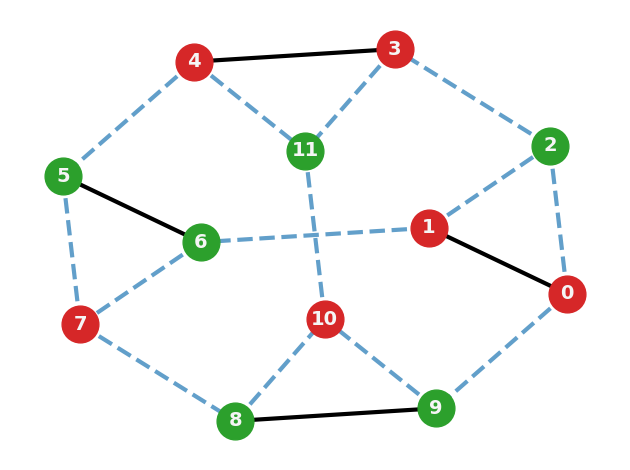

In [9]:
best_sample2 = sampleset2.first.sample
print(best_sample2)
maxcut_viz(G2, best_sample2)

[click here for solution](BQM_MaxCut_Solution.ipynb#Task2)

---

## Formulating BQM from Scratch using Ising model

For formulating an Ising model for the problem the code used to populate the dictionary should be altered according to the Ising objective function. The remaining steps would be the same.

### Step 1 - Define Ising Model

Define the Ising Model in dictionary form using the objective function

$$\min \sum_{(i, j) \in E} s_i s_j$$

In [19]:
h = {}
J = {}

for i, j in G.edges:
    J[(i, j)] = 1

print("h:", h)
print("J:", J)

h: {}
J: {(0, 1): 1, (0, 2): 1, (0, 3): 1, (1, 2): 1, (1, 3): 1, (2, 3): 1, (2, 4): 1, (3, 4): 1}


### Step 2 -  Create BQM instance out of Ising Model

Create an instance of BQM from the dictionaries `h` and `J`.

In [16]:
bqm = BQM.from_ising(h, J)

### Step 3 - Solve the BQM

We will solve it using `ExactSolver()`.

In [17]:
sampler = ExactSolver()
sampleset = sampler.sample(bqm)

print(sampleset)

    0  1  2  3  4 energy num_oc.
8  -1 -1 +1 +1 -1   -4.0       1
29 +1 +1 -1 -1 +1   -4.0       1
4  -1 +1 +1 -1 -1   -2.0       1
6  +1 -1 +1 -1 -1   -2.0       1
9  +1 -1 +1 +1 -1   -2.0       1
11 -1 +1 +1 +1 -1   -2.0       1
12 -1 +1 -1 +1 -1   -2.0       1
14 +1 -1 -1 +1 -1   -2.0       1
17 +1 -1 -1 +1 +1   -2.0       1
19 -1 +1 -1 +1 +1   -2.0       1
25 +1 -1 +1 -1 +1   -2.0       1
27 -1 +1 +1 -1 +1   -2.0       1
28 -1 +1 -1 -1 +1   -2.0       1
30 +1 -1 -1 -1 +1   -2.0       1
2  +1 +1 -1 -1 -1    0.0       1
5  +1 +1 +1 -1 -1    0.0       1
7  -1 -1 +1 -1 -1    0.0       1
13 +1 +1 -1 +1 -1    0.0       1
15 -1 -1 -1 +1 -1    0.0       1
16 -1 -1 -1 +1 +1    0.0       1
18 +1 +1 -1 +1 +1    0.0       1
23 -1 -1 +1 +1 +1    0.0       1
24 -1 -1 +1 -1 +1    0.0       1
26 +1 +1 +1 -1 +1    0.0       1
1  +1 -1 -1 -1 -1    2.0       1
3  -1 +1 -1 -1 -1    2.0       1
20 -1 +1 +1 +1 +1    2.0       1
22 +1 -1 +1 +1 +1    2.0       1
10 +1 +1 +1 +1 -1    4.0       1
31 -1 -1 -

<div class="alert alert-block alert-info">
Note that the energy in this case is not -6 but -4. 

The reason is that instead of using the equivalent Ising model which is $\min  \frac{1}{2} \sum_{(i, j) \in E} (s_is_j-1)$, we simply used $\min \sum_{(i,j) \in E} s_is_j$. If you would like to get the same energy, you should use the first formulation. In practice, once you get the solution, you can determine the number of edges in the cut.
</div>

### Step 4 - Get the best sample

We get the first sample, sample with the lowest energy.

In [ ]:
os = sampleset.first.sample

### Step 5 - Visualize the result

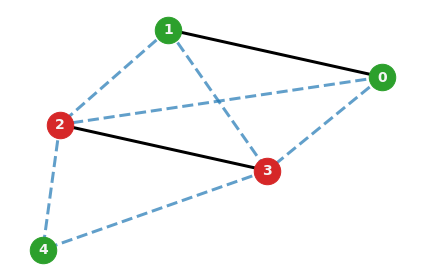

In [15]:
maxcut_viz(G, os)

### Task 3

Obtain the maximum cut for the following graph

1. Define the dictionaries `h` and `J`
2. Create an instance of BQM from the dictionaries and solve it using the classical solver
3. Visualize the output obtained from the sampleset

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


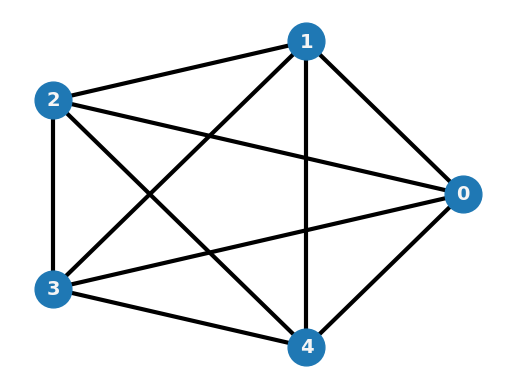

In [10]:
G3 = nx.complete_graph(5)

graph_viz(G3)

In [11]:
# Your code here

h = {}
J = {}

for i, j in G3.edges:
    J[(i, j)] = 1

print("h:", h)
print("J:", J)

h: {}
J: {(0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 3): 1, (2, 4): 1, (3, 4): 1}


In [13]:
bqm2 = BQM.from_ising(h, J)
sampler = ExactSolver()
sampleset2 = sampler.sample(bqm2)

print(sampleset2)

    0  1  2  3  4 energy num_oc.
2  +1 +1 -1 -1 -1   -2.0       1
4  -1 +1 +1 -1 -1   -2.0       1
5  +1 +1 +1 -1 -1   -2.0       1
6  +1 -1 +1 -1 -1   -2.0       1
8  -1 -1 +1 +1 -1   -2.0       1
9  +1 -1 +1 +1 -1   -2.0       1
11 -1 +1 +1 +1 -1   -2.0       1
12 -1 +1 -1 +1 -1   -2.0       1
13 +1 +1 -1 +1 -1   -2.0       1
14 +1 -1 -1 +1 -1   -2.0       1
16 -1 -1 -1 +1 +1   -2.0       1
17 +1 -1 -1 +1 +1   -2.0       1
19 -1 +1 -1 +1 +1   -2.0       1
23 -1 -1 +1 +1 +1   -2.0       1
24 -1 -1 +1 -1 +1   -2.0       1
25 +1 -1 +1 -1 +1   -2.0       1
27 -1 +1 +1 -1 +1   -2.0       1
28 -1 +1 -1 -1 +1   -2.0       1
29 +1 +1 -1 -1 +1   -2.0       1
30 +1 -1 -1 -1 +1   -2.0       1
1  +1 -1 -1 -1 -1    2.0       1
3  -1 +1 -1 -1 -1    2.0       1
7  -1 -1 +1 -1 -1    2.0       1
10 +1 +1 +1 +1 -1    2.0       1
15 -1 -1 -1 +1 -1    2.0       1
18 +1 +1 -1 +1 +1    2.0       1
20 -1 +1 +1 +1 +1    2.0       1
22 +1 -1 +1 +1 +1    2.0       1
26 +1 +1 +1 -1 +1    2.0       1
31 -1 -1 -

{0: -1, 1: -1, 2: 1, 3: 1, 4: 1}


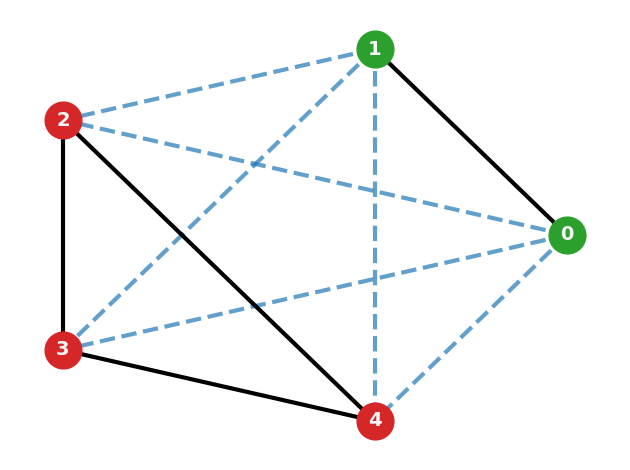

In [15]:
os2 = sampleset2.first.sample
print(os2)
maxcut_viz(G3, os2)

[click here for solution](BQM_MaxCut_Solution.ipynb#Task3)

---

# References

1. F. Glover, G. Kochenberger and Y. Du. "Quantum Bridge Analytics I: A Tutorial on Formulating and Using QUBO Models," [arXiv:1811.11538v6](https://arxiv.org/abs/1811.11538v6), 2019.

2. ["Maximum Cut"](https://github.com/dwave-examples/maximum-cut),  D-Wave Systems Examples, accessed November 2021.